<a href="https://colab.research.google.com/github/Kedar43/ML-projects/blob/main/Image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

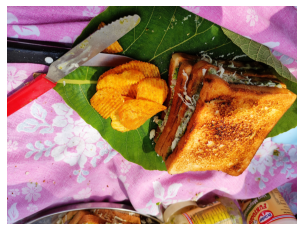

In [5]:
img = plt.imread("/content/4AF160FD-DBEF-48F6-9F2C-1507E383B5E3.jpeg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [6]:
type(img)

numpy.ndarray

In [7]:
print(img.shape)
print(img.size)

(3472, 4624, 3)
48163584


In [8]:
w, h, d = img.shape
image_array = img.reshape(w*h, d)
print(image_array.shape)

# normalize in range of (0, 1)
image_array = image_array / 225

(16054528, 3)


In [9]:
from sklearn.utils import shuffle

# fitting model on a small sub sample of the complete image

image_array_sample = shuffle(image_array, random_state = 1)[:1000]
image_array_sample.size

3000

In [10]:
kmeans = KMeans(n_clusters = 5, random_state = 1)
kmeans.fit(image_array_sample)

KMeans(n_clusters=5, random_state=1)

In [11]:
labels = kmeans.predict(image_array)
labels

array([4, 4, 4, ..., 4, 4, 4], dtype=int32)

In [12]:
c = kmeans.cluster_centers_
print(c)

[[1.02038889 0.64872222 0.16227778]
 [0.18192163 0.16541063 0.05724101]
 [1.02494165 0.88411974 0.99521055]
 [0.60477945 0.38512563 0.173177  ]
 [0.79766408 0.56064083 0.72270801]]


In [13]:
# recreate original image according to labels and each pixels
def recreate_image(c, labels, w, h, d):
  image = np.zeros((w, h, d))
  label_idx = 0

  # now label each pixels according to the limited labels
  for i in range(w):
    for j in range(h):
      image[i][j] = c[labels[label_idx]]
      label_idx += 1
  return image

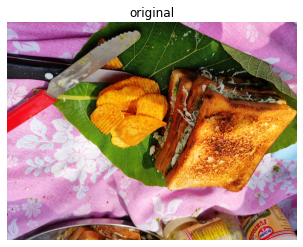

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


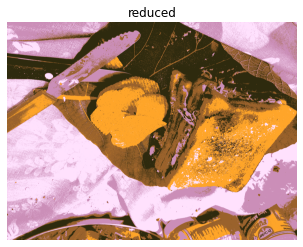

In [14]:
plt.figure(1)
plt.axis("off")
plt.title("original")
plt.imshow(img)
plt.show()

plt.figure(2)
plt.axis("off")
plt.title("reduced")
plt.imshow(recreate_image(c, labels, w, h, d))
plt.show()